# Loantap

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

This case study will focus on Personal Loan only which is one of 4 main financial instruments offered by Loantap.

The case study focuses to identify if a new customer would be defaulting the loan or repaying based on the attributes. We will make use of Logistic Regression for solving this problem.

In [219]:
!gdown 1wI2oGGZBqxwP6nLiapE8M_QjGc-wXeMV

Downloading...
From: https://drive.google.com/uc?id=1wI2oGGZBqxwP6nLiapE8M_QjGc-wXeMV
To: /content/loantap.csv
100% 100M/100M [00:00<00:00, 124MB/s]


In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [221]:
df = pd.read_csv('loantap.csv')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

There are null values present in considerable amount in 6 columns. So we cannot drop them.

In [ ]:
df.isna().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

The percentage of missing values are high in columns like emp_title, emp_length, mort_acc etc. We will have to impute them.

In [ ]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
#Distribution of target variable
df['loan_status'].value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

<ipython-input-15-665aec29784f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

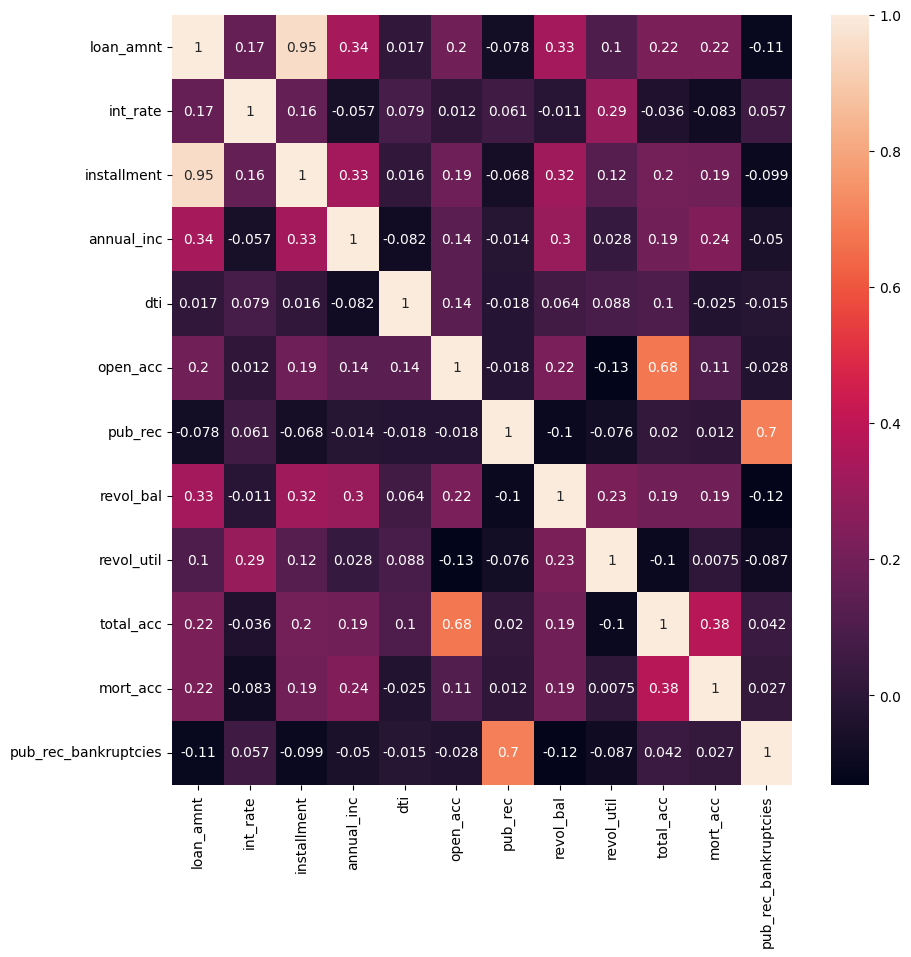

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

We can see high correlation between features like pub_rec&pub_rec_bankruptcies, total_acc&open_acc, and mort_acc&total_acc.

Also, we can see almost perfect correlation between loan_amnt and installment.

1. installment: The monthly payment owed by the borrower if the loan originates.
2. loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

So we can drop either one of these columns.

In [ ]:
df.drop('installment', axis=1, inplace=True)

In [ ]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 396030, dtype: object

<Axes: xlabel='loan_status', ylabel='count'>

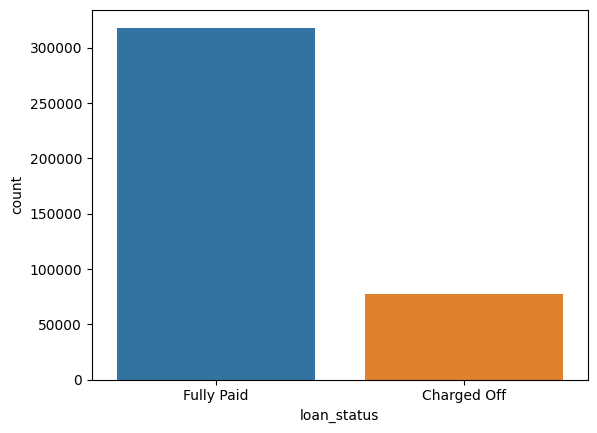

In [ ]:
sns.countplot(data=df,x=df['loan_status'])

In [222]:
df['loan_status'].value_counts()/len(df)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

We can see that in the target variable column, Fully paid that is 0 is more and Charged Off that is 1 is less. It implies that it's and imbalanced dataset.

In [ ]:
df.shape[0]

396030

In [ ]:
df['address'].nunique()

393700

Since total data points is higher in number compared to distinct address, we can understand that some customers has been associated with Loantap multiple times.

In [ ]:
col=list(df.columns)

In [ ]:
col

['loan_amnt',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'address']

In [ ]:
num_col = []
for i in col:
    if type(df[i][0])!=str:
        num_col.append(i)

In [ ]:
num_col

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

Above are the numerical columns

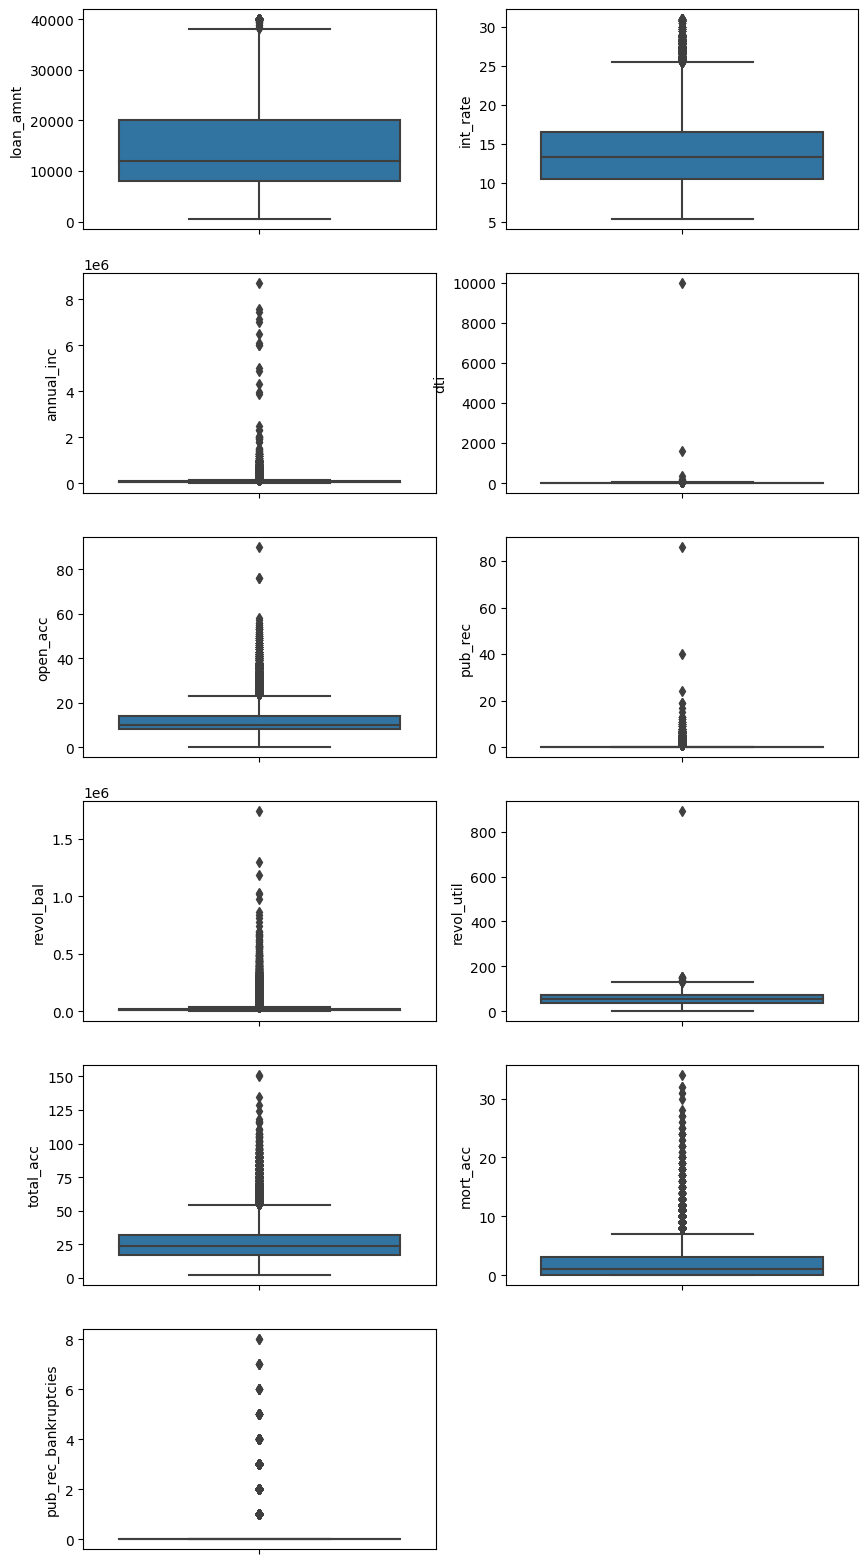

In [ ]:
plt.figure(figsize=(10,20))
j=1
for i in num_col:
    plt.subplot(6,2,j)
    sns.boxplot(data=df,y=i)

    j+=1

As we can see from boxplots of numerical columns, there are outliers present in all of them. We will have to remove them before we use the data for training our model.

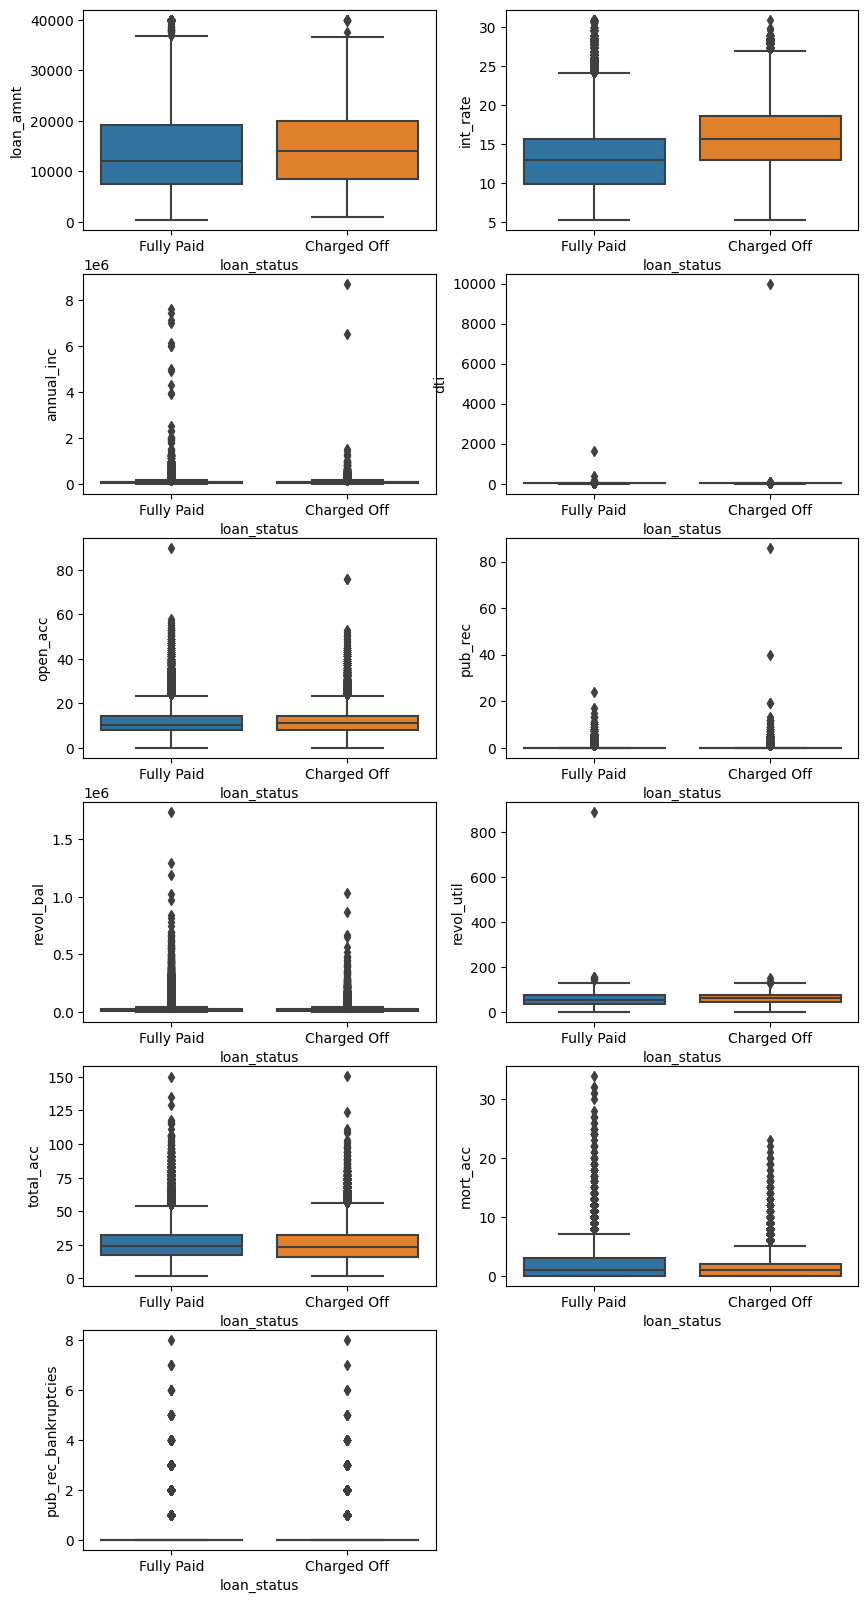

In [ ]:
plt.figure(figsize=(10,20))
j=1
for i in num_col:
    plt.subplot(6,2,j)
    sns.boxplot(data=df,y=i, x='loan_status')

    j+=1

We can see that interest rate is considerably higher for those loans which are defaulted than those which are completely paid.

Now we have to process the data in some columns and do some feature engineering steps inorder to treat the outliers and handle missing values and also make the data ready to train the model.

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Filling of null values in columns revol_util, mort_acc, pub_rec_bankruptcies

In [ ]:
col = list(df.columns)

In [ ]:
num_col = []

for i in col:
    if type(df[i][0])!=str:
        num_col.append(i)

In [ ]:
num_col

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
dft = df[num_col]
dft.isna().sum()

loan_amnt                   0
int_rate                    0
annual_inc                  0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
ki = KNNImputer()

dft = pd.DataFrame(ki.fit_transform(dft), columns = num_col)

In [ ]:
dft.isna().sum()

loan_amnt               0
int_rate                0
annual_inc              0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [ ]:
dft[['pub_rec_bankruptcies','mort_acc']] = dft[['pub_rec_bankruptcies','mort_acc']].round()

In [ ]:
np.sum(df['mort_acc']!=dft['mort_acc'])

37795

In [ ]:
np.sum(df['pub_rec_bankruptcies']!=dft['pub_rec_bankruptcies'])

535

In [ ]:
np.sum(df['revol_util']!=dft['revol_util'])

276

Now we will take these values back to our original dataframe df

In [ ]:
df[['revol_util','pub_rec_bankruptcies','mort_acc']] = dft[['revol_util','pub_rec_bankruptcies','mort_acc']]

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
dtype: int64

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


We can see that average amount for the loans which are charged off are slightly above than which are fully paid.

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

We will combine minority columns Any, None, Other as Other.

In [ ]:
df['home_ownership'].replace(['ANY','NONE'], 'OTHER', inplace=True)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [ ]:
df.loc[df['home_ownership']=='OTHER', 'loan_status'].value_counts()

Fully Paid     123
Charged Off     23
Name: loan_status, dtype: int64

In [ ]:
#Converting string to datetime format

df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [ ]:
df['title'].value_counts()[:20]

Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: title, dtype: int64

Since it looks like manually typed, we will need some formatting here.

In [ ]:
df['title'] = df['title'].str.lower()

In [ ]:
df['title'].value_counts()[:20]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
credit card refinance          1832
moving and relocation          1693
consolidate                    1528
personal                       1465
home buying                    1196
Name: title, dtype: int64

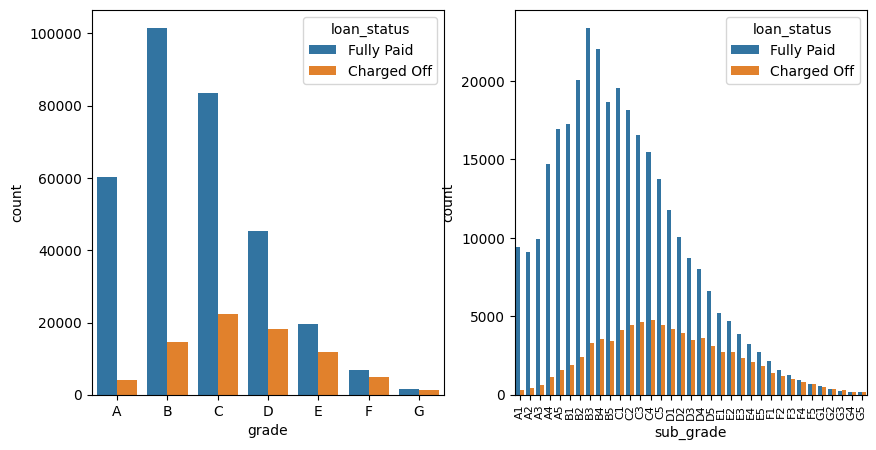

In [ ]:
plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
grade=np.sort(df['grade'].unique())
sns.countplot(data=df, x='grade', hue='loan_status', order=grade)

plt.subplot(1,2,2)
grade=np.sort(df['sub_grade'].unique())
sns.countplot(data=df, x='sub_grade', hue='loan_status', order=grade)
plt.xticks(rotation=90, size=8)
plt.show()

Grade B has the highest chance of repayment, and the sub_grade which has the highest chance of repayment is B3.

In [ ]:
df['term']=df['term'].apply(lambda x: x[:3]).astype('int')

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Now we have the column named sub_grade of which the first letter is the grade itself and the second letter varies from 1-5. Since the grade has already been captured in the column 'grade' will only make use of second letter here.

In [ ]:
df['sub_grade'] = df['sub_grade'].apply(lambda x: x[1]).astype(int)

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,B,4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,B,5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,B,3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,A,2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,C,5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  int64         
 2   int_rate              396030 non-null  float64       
 3   grade                 396030 non-null  object        
 4   sub_grade             396030 non-null  int64         
 5   emp_title             373103 non-null  object        
 6   emp_length            377729 non-null  object        
 7   home_ownership        396030 non-null  object        
 8   annual_inc            396030 non-null  float64       
 9   verification_status   396030 non-null  object        
 10  issue_d               396030 non-null  datetime64[ns]
 11  loan_status           396030 non-null  object        
 12  purpose               396030 non-null  object        
 13 

In [ ]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [ ]:
df['emp_length'] = df['emp_length'].astype('str')

In [ ]:
def fun(x):
    try:
        return int(x[-2])
    except:
        if len(x)==1:
            return np.nan
        else:
            return 10

In [ ]:
df['emp_length'].str.split().apply(fun).value_counts()

10.0    126041
1.0      57607
2.0      35827
3.0      31665
5.0      26495
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: emp_length, dtype: int64

In [ ]:
df['emp_length'].str.split().value_counts()

[10+, years]    126041
[2, years]       35827
[<, 1, year]     31725
[3, years]       31665
[5, years]       26495
[1, year]        25882
[4, years]       23952
[6, years]       20841
[7, years]       20819
[8, years]       19168
[nan]            18301
[9, years]       15314
Name: emp_length, dtype: int64

In [ ]:
df['emp_length'] = df['emp_length'].str.split().apply(fun)

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,B,4,Marketing,10.0,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,B,5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,B,3,Statistician,1.0,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,A,2,Client Advocate,6.0,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,C,5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

We will have one hot encode target variable column. 0 should be fully paid and 1 should be charged off.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1).value_counts()

0    318357
1     77673
Name: loan_status, dtype: int64

In [ ]:
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,B,4,Marketing,10.0,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,B,5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,B,3,Statistician,1.0,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,A,2,Client Advocate,6.0,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,C,5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [ ]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [ ]:
df['zip_code'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zip_code, dtype: int64

We will drop the columns 'emp_title','emp_length', 'title', 'issue_d', 'earliest_cr_line', 'address'

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'zip_code'],
      dtype='object')

In [ ]:
df.drop(['emp_title','emp_length', 'title', 'issue_d', 'earliest_cr_line', 'address'], axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'zip_code'],
      dtype='object')

For the column 'pub_rec' we will create flag that is when the value is 0 it will be 0 and in other cases when it is greater than 0 it would be 1.

In [ ]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 0 if x==0 else 1)

In [ ]:
df['pub_rec'].value_counts()

0    338272
1     57758
Name: pub_rec, dtype: int64

In [ ]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [ ]:
le2=LabelEncoder()

df['initial_list_status'] = le2.fit_transform(df['initial_list_status'])

df['initial_list_status'].value_counts()

0    238066
1    157964
Name: initial_list_status, dtype: int64

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
zip_code                0
dtype: int64

For the column 'mort_acc' and 'pub_rec_bankruptcies' we will create flag that is when the value is 0 it will be 0 and in other cases when it is greater than 0 it would be 1.

In [ ]:
df['mort_acc'].value_counts()

0.0     146080
1.0      73555
2.0      59893
3.0      43418
4.0      30044
5.0      18857
6.0      11234
7.0       6091
8.0       3131
9.0       1660
10.0       866
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350895
1.0     42810
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
def flag_column(x):
    if x==0:
        return 0
    elif x>0:
        return 1
    else:
        return np.nan

In [ ]:
df['mort_acc'] = df['mort_acc'].apply(flag_column)

In [ ]:
df['mort_acc'].value_counts()

1    249950
0    146080
Name: mort_acc, dtype: int64

In [ ]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(flag_column)

In [ ]:
df['pub_rec_bankruptcies'].value_counts()

0    350895
1     45135
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36,11.44,B,4,RENT,117000.0,Not Verified,0,vacation,...,16.0,0,36369.0,41.8,25.0,1,INDIVIDUAL,0,0,22690
1,8000.0,36,11.99,B,5,MORTGAGE,65000.0,Not Verified,0,debt_consolidation,...,17.0,0,20131.0,53.3,27.0,0,INDIVIDUAL,1,0,05113
2,15600.0,36,10.49,B,3,RENT,43057.0,Source Verified,0,credit_card,...,13.0,0,11987.0,92.2,26.0,0,INDIVIDUAL,0,0,05113
3,7200.0,36,6.49,A,2,RENT,54000.0,Not Verified,0,credit_card,...,6.0,0,5472.0,21.5,13.0,0,INDIVIDUAL,0,0,00813
4,24375.0,60,17.27,C,5,MORTGAGE,55000.0,Verified,1,credit_card,...,13.0,0,24584.0,69.8,43.0,0,INDIVIDUAL,1,0,11650


In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
zip_code                0
dtype: int64

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'zip_code'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   grade                 396030 non-null  object 
 4   sub_grade             396030 non-null  int64  
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  int64  
 13  revol_bal             396030 non-null  float64
 14  revol_util            396030 non-null  float64
 15  

In [ ]:
df.to_csv('processed_data')

In [80]:
!gdown 1ulJJAvu4QVzbiR3I7p-Y6FFy2ordnLEB

Downloading...
From: https://drive.google.com/uc?id=1ulJJAvu4QVzbiR3I7p-Y6FFy2ordnLEB
To: /content/processed_data.csv
100% 49.7M/49.7M [00:00<00:00, 162MB/s]


In [81]:
import pandas as pd
dft1 = pd.read_csv('processed_data.csv')

In [82]:
dft1.head()

,Unnamed: 0,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,0,10000.0,36,11.44,B,4,RENT,117000.0,Not Verified,0,vacation,26.24,16.0,0,36369.0,41.8,25.0,1,INDIVIDUAL,0,0,22690
1,1,8000.0,36,11.99,B,5,MORTGAGE,65000.0,Not Verified,0,debt_consolidation,22.05,17.0,0,20131.0,53.3,27.0,0,INDIVIDUAL,1,0,5113
2,2,15600.0,36,10.49,B,3,RENT,43057.0,Source Verified,0,credit_card,12.79,13.0,0,11987.0,92.2,26.0,0,INDIVIDUAL,0,0,5113
3,3,7200.0,36,6.49,A,2,RENT,54000.0,Not Verified,0,credit_card,2.60,6.0,0,5472.0,21.5,13.0,0,INDIVIDUAL,0,0,813
4,4,24375.0,60,17.27,C,5,MORTGAGE,55000.0,Verified,1,credit_card,33.95,13.0,0,24584.0,69.8,43.0,0,INDIVIDUAL,1,0,11650


In [83]:
dft1.drop('Unnamed: 0', axis=1, inplace=True)

In [85]:
dft1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   grade                 396030 non-null  object 
 4   sub_grade             396030 non-null  int64  
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  int64  
 13  revol_bal             396030 non-null  float64
 14  revol_util            396030 non-null  float64
 15  

In [86]:
df1=dft1.copy()

In [87]:
df1.isna().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
zip_code                0
dtype: int64

One hot encoding

In [88]:
dummies = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'zip_code']
df1 = pd.get_dummies(df1, columns=dummies, drop_first=True)

In [89]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df1.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_2,sub_grade_3,sub_grade_4,sub_grade_5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,zip_code_5113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [90]:
df1.isna().sum()

loan_amnt                              0
term                                   0
int_rate                               0
annual_inc                             0
loan_status                            0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
mort_acc                               0
pub_rec_bankruptcies                   0
grade_B                                0
grade_C                                0
grade_D                                0
grade_E                                0
grade_F                                0
grade_G                                0
sub_grade_2                            0
sub_grade_3                            0
sub_grade_4                            0
sub_grade_5                            0
home_ownership_O

In [92]:
df1.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'loan_status', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_2',
       'sub_grade_3', 'sub_grade_4', 'sub_grade_5', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'zip_code_5113', 'zip_code_11650',
       'zip_code_22690', 'zip_code_29597', 'zip_code_30723', 'zip_

There are outliers present in the data. We will have to remove them. We will remove outliers from 'loan_amnt', 'int_rate',  'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'total_acc'

In [93]:
cols = ['loan_amnt', 'int_rate',  'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']

In [94]:
df2 = df1.copy()

for i in cols:
    iqr = df2[i].quantile(.75) - df2[i].quantile(.25)
    upper = df2[i].quantile(.75)+1.5*iqr
    lower = df2[i].quantile(.25)-1.5*iqr
    df2=df2[(df2[i]>lower) & (df2[i]<upper)]

In [95]:
df1.shape

(396030, 53)

In [96]:
df2.shape

(340638, 53)

**Multicollinearity check using VIF**

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
X = df2.drop('loan_status', axis=1)
y = df2['loan_status']

In [99]:
def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

calc_vif(X)[:5]

,Feature,VIF
2,int_rate,240.49
41,application_type_INDIVIDUAL,175.13
29,purpose_debt_consolidation,49.12
1,term,28.16
15,grade_D,23.89


In [100]:
#Dropping the column with highest vif score and recalculating vif

X.drop('int_rate', axis=1, inplace=True)

calc_vif(X)[:5]

,Feature,VIF
40,application_type_INDIVIDUAL,131.66
28,purpose_debt_consolidation,49.10
1,term,28.06
27,purpose_credit_card,17.76
4,open_acc,14.47


In [101]:
#Dropping the column with highest vif score and recalculating vif

X.drop('application_type_INDIVIDUAL', axis=1, inplace=True)

calc_vif(X)[:5]

,Feature,VIF
1,term,24.56
28,purpose_debt_consolidation,22.37
4,open_acc,14.20
8,total_acc,12.14
2,annual_inc,9.78


In [102]:
#Dropping the column with highest vif score and recalculating vif

X.drop('term', axis=1, inplace=True)

calc_vif(X)[:5]

,Feature,VIF
27,purpose_debt_consolidation,19.35
3,open_acc,14.20
7,total_acc,12.11
1,annual_inc,9.77
6,revol_util,9.48


In [103]:
#Dropping the column with highest vif score and recalculating vif

X.drop('purpose_debt_consolidation', axis=1, inplace=True)

calc_vif(X)[:5]

,Feature,VIF
3,open_acc,13.62
7,total_acc,12.09
1,annual_inc,9.33
6,revol_util,8.84
2,dti,7.54


In [104]:
#Dropping the column with highest vif score and recalculating vif

X.drop('open_acc', axis=1, inplace=True)

calc_vif(X)[:5]

,Feature,VIF
1,annual_inc,9.15
5,revol_util,8.40
6,total_acc,8.31
2,dti,7.02
0,loan_amnt,6.84


Now vif of all the columns has come down below 10 so we will stop dropping the columns and proceed with scaling of data.

We will now split the dataset into train-val-test datasets.

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=.25, random_state=42)

In [107]:
X_train.shape

(204382, 47)

In [108]:
X_test.shape

(68128, 47)

In [109]:
X_val.shape

(68128, 47)

### Scaling of the data using MinMaxScaler

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler = MinMaxScaler()

In [112]:
X_train_scl =scaler.fit_transform(X_train)
X_train_scl

array([[0.28074866, 0.33883351, 0.4020212 , ..., 1.        , 0.        ,
        0.        ],
       [0.05882353, 0.3140726 , 0.30983485, ..., 1.        , 0.        ,
        0.        ],
       [0.54812834, 0.62553879, 0.44392408, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.62834225, 0.84708378, 0.26743899, ..., 0.        , 0.        ,
        0.        ],
       [0.2540107 , 0.33883351, 0.27212226, ..., 1.        , 0.        ,
        0.        ],
       [0.1657754 , 0.10013834, 0.37121025, ..., 0.        , 0.        ,
        0.        ]])

Now using the same scaler we will transform validation and test data.

In [113]:
X_val_scl =scaler.transform(X_val)
X_test_scl =scaler.transform(X_test)

In [114]:
X_val_scl

array([[0.43449198, 0.2241514 , 0.54744885, ..., 0.        , 0.        ,
        0.        ],
       [0.46791444, 0.3811877 , 0.32758196, ..., 0.        , 0.        ,
        0.        ],
       [0.12032086, 0.29973734, 0.10944047, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18917112, 0.09774044, 0.27088982, ..., 0.        , 0.        ,
        0.        ],
       [0.16042781, 0.2598006 , 0.56716786, ..., 1.        , 0.        ,
        0.        ],
       [0.30748663, 0.69069909, 0.33546956, ..., 0.        , 0.        ,
        0.        ]])

In [115]:
X_test_scl

array([[0.24197861, 0.31928543, 0.18067538, ..., 0.        , 0.        ,
        0.        ],
       [0.15240642, 0.13683661, 0.37737244, ..., 0.        , 0.        ,
        0.        ],
       [0.22727273, 0.31928543, 0.17599211, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.65508021, 0.69069909, 0.14493468, ..., 1.        , 0.        ,
        0.        ],
       [0.34692513, 0.49521821, 0.21493715, ..., 0.        , 0.        ,
        0.        ],
       [0.30748663, 0.33231748, 0.31698299, ..., 0.        , 0.        ,
        0.        ]])

### Oversampling using SMOTE

In [116]:
y_train.value_counts()

0    164426
1     39956
Name: loan_status, dtype: int64

Since our train data is imbalanced we need to either oversample or undersample or provide class weights here. Here we will go for oversampling using smote.

In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
sm = SMOTE(random_state=42)

X_train_scl_res, y_train_res = sm.fit_resample(X_train_scl, y_train)

In [119]:
y_train_res.value_counts()

1    164426
0    164426
Name: loan_status, dtype: int64

In [120]:
#Length before oversampling

len(y_train)

204382

In [121]:
#Length after oversampling

len(y_train_res)

328852

Now we will train a simple LogisticRegression model using the train data.

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
model = LogisticRegression(max_iter=1000)

In [124]:
#Training the model
model.fit(X_train_scl_res, y_train_res)

LogisticRegression(max_iter=1000)

In [125]:
model.coef_

array([[ 1.02750537, -1.52984485,  1.00487397, -0.08233252, -0.30602315,
         0.38075624, -0.15756401,  0.03103096, -0.07993712,  0.06380453,
         0.75766643,  1.32911536,  1.69353565,  2.02291186,  2.23114539,
         1.88936417,  0.1046318 ,  0.21447751,  0.28566464,  0.38126384,
         0.16155779, -0.07583531,  0.11928134,  0.22299085,  0.09842244,
        -0.2115783 , -0.53605268, -0.19485578, -0.72921254, -0.36022575,
        -0.32511094, -0.27128715, -0.33775433,  0.04084898, -0.03371014,
        -0.65608978, -1.12278558, -1.5217893 , -2.94074045, 13.6036351 ,
         5.97918562, -2.94021741,  5.95894603,  6.02440958,  5.97205835,
        13.60431393, 13.57930202]])

In [126]:
model.intercept_

array([-7.66738021])

In [127]:
#Accuracy on train data

model.score(X_train_scl_res, y_train_res)

0.8057180737839514

In [128]:
#Accuracy on val data

model.score(X_val_scl, y_val)

0.7944163926726162

In [129]:
#Accuracy on test data

model.score(X_test_scl, y_test)

0.7938732973226867

In [130]:
y.value_counts()

0    274047
1     66591
Name: loan_status, dtype: int64

Since our data is having imbalance we cannot rely on accuracy metric.

In [131]:
from sklearn.metrics import recall_score, precision_score

In [132]:
recall_score(y_train_res, model.predict(X_train_scl_res))

0.8202717331808838

In [133]:
recall_score(y_val, model.predict(X_val_scl))

0.8068310337027822

In [134]:
recall_score(y_test, model.predict(X_test_scl))

0.8028716721507628

In [135]:
precision_score(y_train_res, model.predict(X_train_scl_res))

0.797071129707113

In [136]:
precision_score(y_val, model.predict(X_val_scl))

0.48322420410927974

In [137]:
precision_score(y_test, model.predict(X_test_scl))

0.48484848484848486

In [138]:
#Test data distibution
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.countplot(data=y_test)

In [139]:
y_test.value_counts()

0    54756
1    13372
Name: loan_status, dtype: int64

# Confusion Matrix

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_scl)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[43349, 11407],
       [ 2636, 10736]])

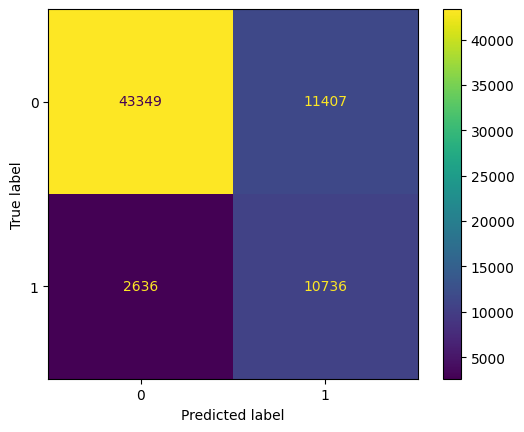

In [141]:
ConfusionMatrixDisplay(conf_matrix).plot()

TP - 1065
TN - 47479
FP - 935
FN - 10918

In [142]:
model.score(X_test_scl, y_test)

0.7938732973226867

In [143]:
import numpy as np

np.diag(conf_matrix).sum()/conf_matrix.sum()

0.7938732973226867

In [144]:
precision_score(y_test, y_pred)

0.48484848484848486

In [145]:
recall_score(y_test, y_pred)

0.8028716721507628

In [146]:
#Precision score = TP/(TP+FP)
#Recall score = TP/(TP+FN)

# Tradeoff

It's important to detect real defaulters and to do so we have to minimize false positives. It's important because if false positives are high we will miss out on opportunity to fund those people and earning interest on it. For this we will have to increase the metric precision score because it takes care of false positives.

Here for the model we created, the precision score we achieved is 0.4926 on the test data which is not very high. We will have to improve the model further.

Since Loantap is dealing with relatively highly risky demography it is important to identify false negatives as well. Because they are NPA(Non Performing Assets). They are highly unlikely to pay back the loan. So unlike banks, for an NBFC like Loantap it's very important to minimize the false negatives and to do so we have to maximize recall score.

If we consider the recall score that we got for the model we created, that is 0.805 which is really low. With this recall score we cannot go ahead. We have to improve the model performance.

ROC curve

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score

In [148]:
probabilities = model.predict_proba(X_test_scl)

In [149]:
probabilities

array([[7.84266004e-01, 2.15733996e-01],
       [9.99918902e-01, 8.10979908e-05],
       [6.39715073e-04, 9.99360285e-01],
       ...,
       [8.89480592e-01, 1.10519408e-01],
       [9.99949632e-01, 5.03677450e-05],
       [9.99956611e-01, 4.33890375e-05]])

In [150]:
#Extracting probability of P(Y=1/X)

probability = probabilities[:,1]

In [151]:
probability

array([2.15733996e-01, 8.10979908e-05, 9.99360285e-01, ...,
       1.10519408e-01, 5.03677450e-05, 4.33890375e-05])

In [152]:
fpr, tpr, thr = roc_curve(y_test, probability)

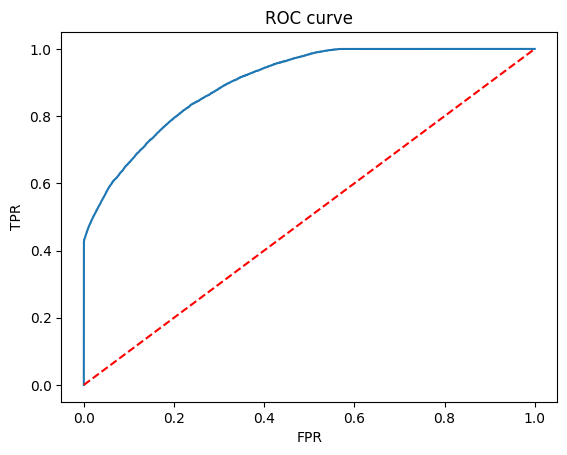

In [153]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)

plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [154]:
roc_auc_score(y_test, probability)

0.9011892563396087

Above ROC shows that the model we created is better than random model. The ROC-AUC score of 0.90425 is actually pretty good. Since the test data is having imbalance we cannot rely on ROC alone. We will have to look at P-R curve as well.

In [155]:
from sklearn.metrics import f1_score

In [156]:
f1_score(y_test, y_pred)

0.6045896100239336

A very low f1_score already implies that the model is performing bad.

Since data here is having imbalance, we will have to check PR curve also.

PR curve

In [157]:
from sklearn.metrics import precision_recall_curve, auc

In [158]:
precision, recall, thr = precision_recall_curve(y_test, probability)

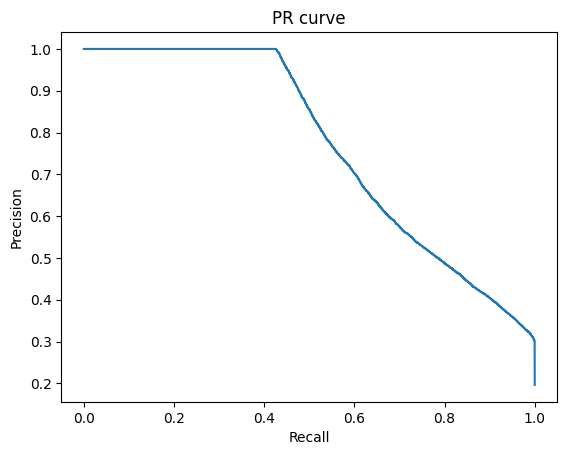

In [159]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [160]:
auc(recall, precision)

0.7685151607025542

Since auc of PR is also low, we will now will try to improve the model by tuning hyperparameter.

# Hyperparameter tuning

In [161]:
from sklearn.pipeline import make_pipeline

In [162]:
train_precision_scores=[]
train_recall_scores=[]
train_accuracy_scores=[]
train_f1_scores=[]

val_precision_scores=[]
val_recall_scores=[]
val_accuracy_scores=[]
val_f1_scores=[]

l=5000.0
for i in np.arange(0.01,l,50.0):
    model= LogisticRegression(C=1/i, max_iter=1500)
    model.fit(X_train_scl_res, y_train_res)

    train_precision_scores.append(precision_score(y_train_res, model.predict(X_train_scl_res)))
    train_recall_scores.append(recall_score(y_train_res, model.predict(X_train_scl_res)))
    train_accuracy_scores.append(model.score(X_train_scl_res, y_train_res))
    train_f1_scores.append(f1_score(y_train_res, model.predict(X_train_scl_res)))

    val_precision_scores.append(precision_score(y_val, model.predict(X_val_scl)))
    val_recall_scores.append(recall_score(y_val, model.predict(X_val_scl)))
    val_accuracy_scores.append(model.score(X_val_scl, y_val))
    val_f1_scores.append(f1_score(y_val, model.predict(X_val_scl)))

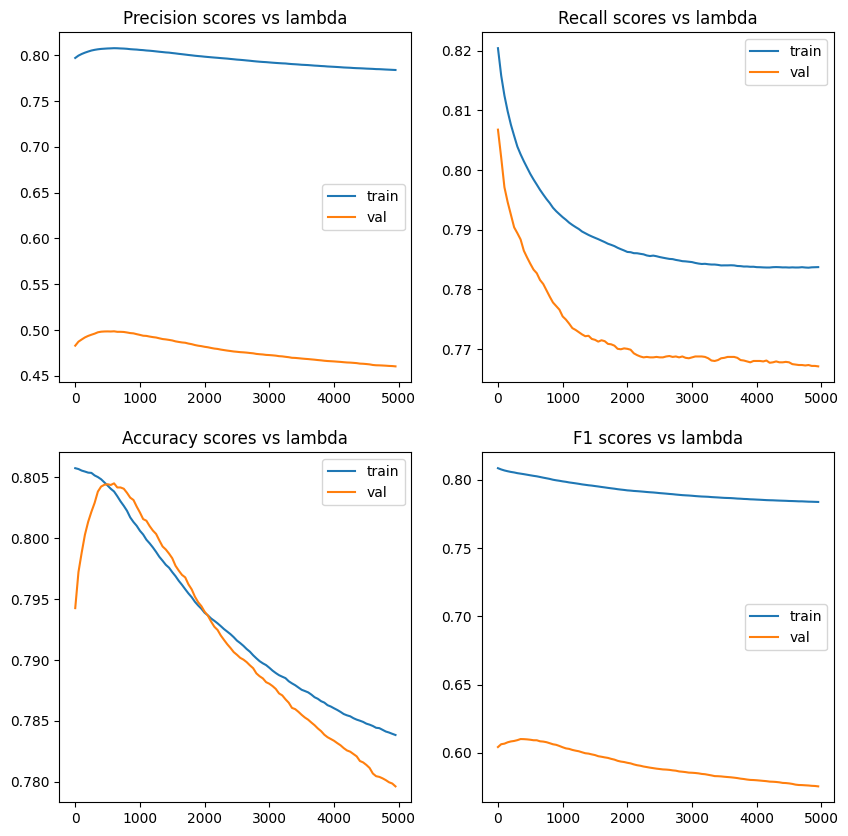

In [163]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(np.arange(0.01,l,50.0), train_precision_scores, label='train')
plt.plot(np.arange(0.01,l,50.0), val_precision_scores, label='val')
plt.legend()
plt.title('Precision scores vs lambda')

plt.subplot(2,2,2)
plt.plot(np.arange(0.01,l,50.0), train_recall_scores, label='train')
plt.plot(np.arange(0.01,l,50.0), val_recall_scores, label='val')
plt.legend()
plt.title('Recall scores vs lambda')

plt.subplot(2,2,3)
plt.plot(np.arange(0.01,l,50.0), train_accuracy_scores, label='train')
plt.plot(np.arange(0.01,l,50.0), val_accuracy_scores, label='val')
plt.legend()
plt.title('Accuracy scores vs lambda')

plt.subplot(2,2,4)
plt.plot(np.arange(0.01,l,50.0), train_f1_scores, label='train')
plt.plot(np.arange(0.01,l,50.0), val_f1_scores, label='val')
plt.legend()
plt.title('F1 scores vs lambda')

plt.show()

We can observe that when value of lambda is close to zero, recall is better. It means that when regularization is really low(close to zero) recall value which is important for our case gets better. So we will go with a value of .01 for lambda. So C will be 1/.01 = 100.

In [216]:
model = LogisticRegression(C=100, max_iter=1500)

model.fit(X_train_scl_res, y_train_res)

LogisticRegression(C=100, max_iter=1500)

In [171]:
print('Train accuracy: ', model.score(X_train_scl_res, y_train_res))
print('Val accuracy: ', model.score(X_val_scl, y_val))
print('Test accuracy: ', model.score(X_test_scl, y_test))

Train accuracy:  0.805745441718463
Val accuracy:  0.7942549318929075
Test accuracy:  0.7938292625645843


In [173]:
print('Train recall: ', recall_score(y_train_res, model.predict(X_train_scl_res)))
print('Val recall: ', recall_score(y_val, model.predict(X_val_scl)))
print('Test recall: ', recall_score(y_test, model.predict(X_test_scl)))

Train recall:  0.8204055319718293
Val recall:  0.8067556359797934
Test recall:  0.8029464552796889


In [174]:
print('Train precision: ', precision_score(y_train_res, model.predict(X_train_scl_res)))
print('Val precision: ', precision_score(y_val, model.predict(X_val_scl)))
print('Test precision: ', precision_score(y_test, model.predict(X_test_scl)))

Train precision:  0.7970362842472836
Val precision:  0.48298275706418703
Test precision:  0.484784179158389


In [176]:
from sklearn.metrics import precision_recall_curve, auc

probabilities = model.predict_proba(X_test_scl)

#Extracting probability  P(y=1|X)

probability = probabilities[:,1]

precision, recall, thr = precision_recall_curve(y_test, probability)

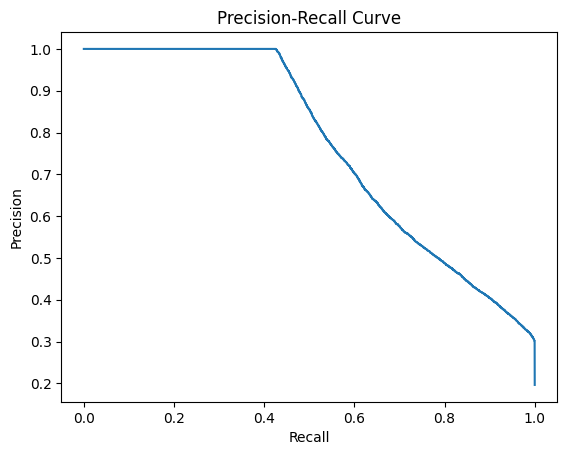

In [179]:
plt.plot(recall, precision)

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

In [180]:
auc(recall, precision)

0.768504331214812

for the final model we can improve recall score further by sacrificing precision score by shifting the threshold from 0.5 to some other value. For example, here we can get the value of recall around 0.9 by sacrificing the value of precision to around 0.4.

**Feature importances**

In logistic regression, when multi-collinearity is removed, feature importance can be directly interpreted from weights.

In [198]:
fi = pd.DataFrame()
fi['weight'] = model.coef_.reshape(-1,)
fi['feature'] = X.columns
fi.sort_values(by='weight', ascending=False,inplace=True)
fi

,weight,feature
45,29.950665,zip_code_86630
39,28.890606,zip_code_11650
46,28.159532,zip_code_93700
43,9.556347,zip_code_48052
40,9.511197,zip_code_22690
44,9.503933,zip_code_70466
42,9.490856,zip_code_30723
14,2.239953,grade_F
13,2.030638,grade_E
15,1.937833,grade_G


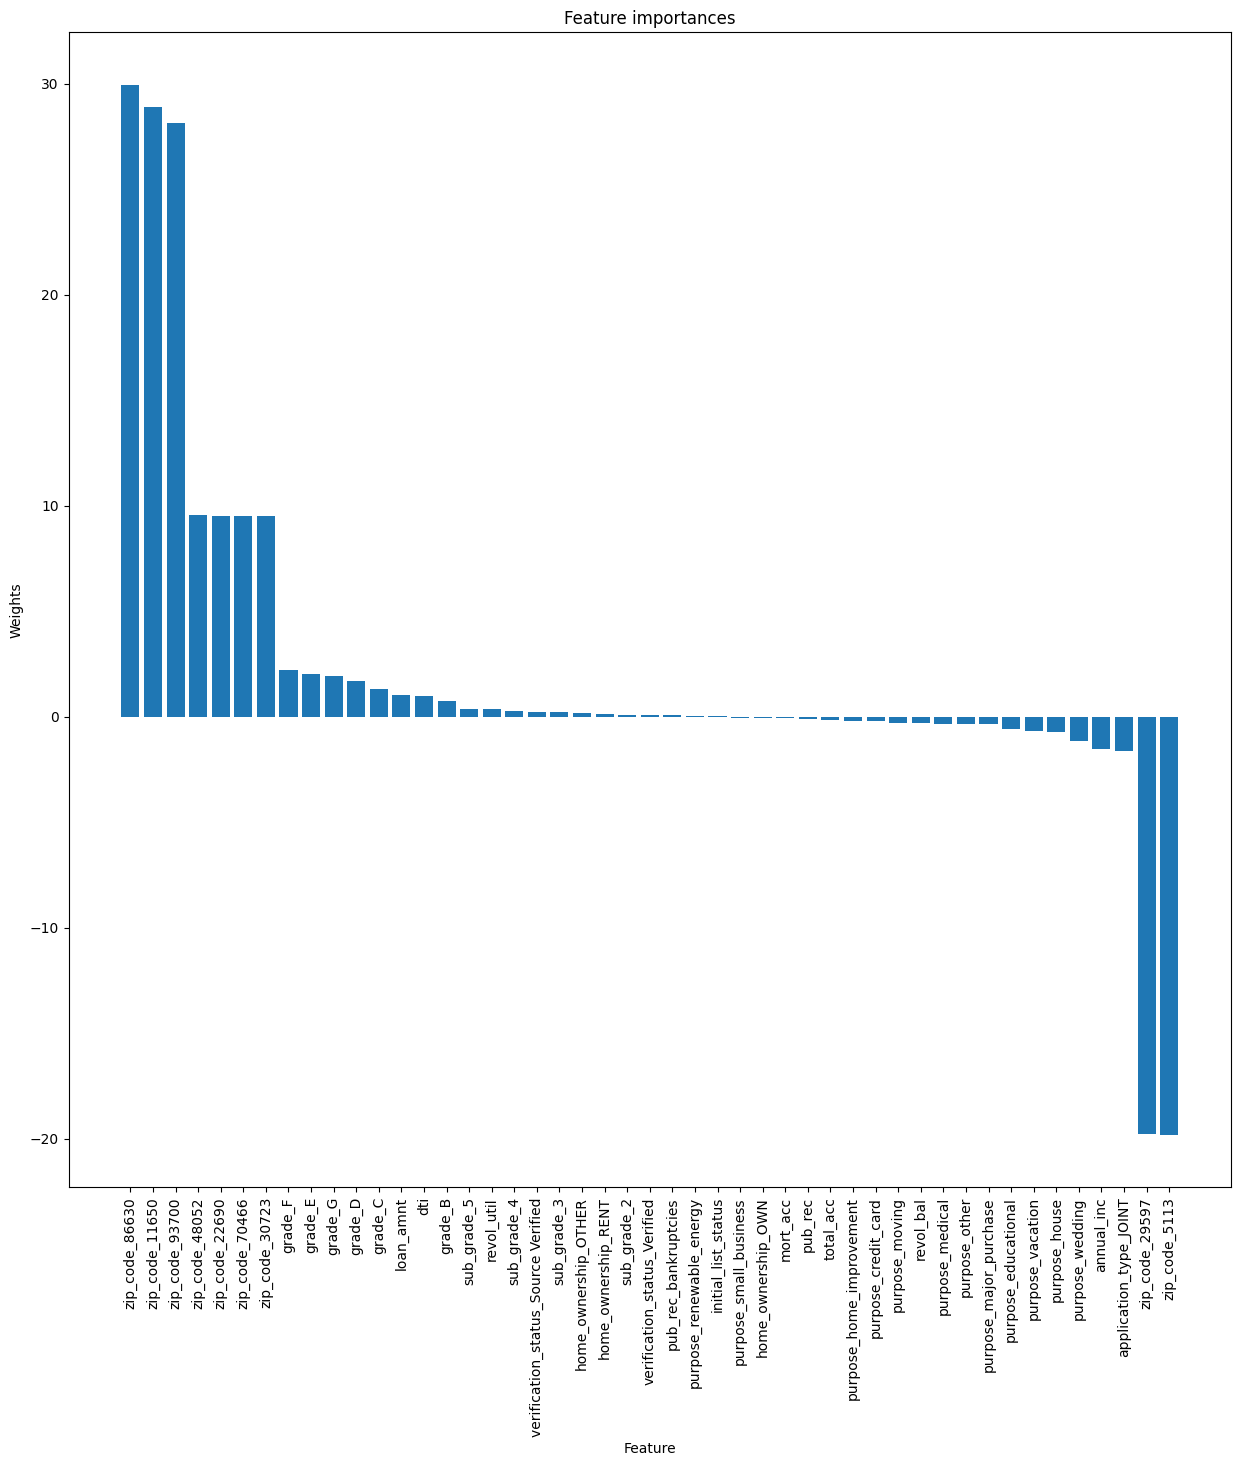

In [201]:
plt.figure(figsize=(15,15))

plt.bar(x=fi['feature'], height=fi['weight'])
plt.xticks(rotation=90)
plt.title('Feature importances')
plt.xlabel('Feature')
plt.ylabel('Weights')
plt.show()

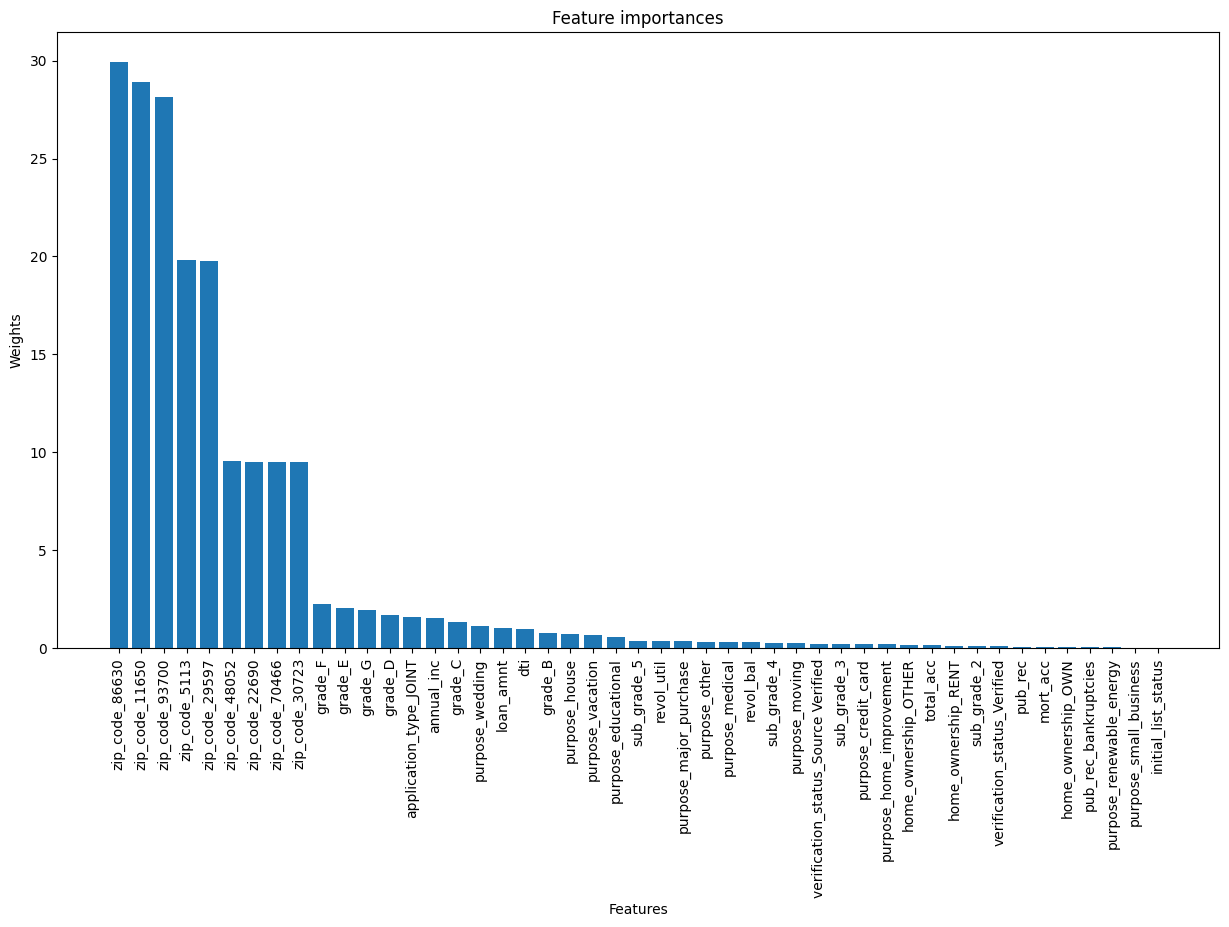

In [208]:
plt.figure(figsize=(15,8))

fi['weight'] = np.abs(fi['weight'])
fi.sort_values(by='weight', ascending=False, inplace=True)

plt.bar(x=fi['feature'], height=fi['weight'])
plt.xticks(rotation=90)
plt.title('Feature importances')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.show()

In [217]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_scl)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     54756
           1       0.48      0.80      0.60     13372

    accuracy                           0.79     68128
   macro avg       0.71      0.80      0.73     68128
weighted avg       0.85      0.79      0.81     68128



# Insights and recommendations

1. Around 80% of the loans are fully repaid, whereas 20% of the customers has defaulted.
2. For the loans which are defaulted interest rates are a bit on the higher side compared to those which are fully repaid.
3. Here since it's important to identify the real defaulters inorder to exclude non performing assets while issuing loans recall is given more importance over precision. If needed, recall value can be further improved by altering threshold probability which by default is 0.5.
4. Since the model is giving a maximum precision value of around 0.48 only even after tweeking the hyperparameter, we will need some advanced bagging or boosting algorithms inorder to improve the model performance.